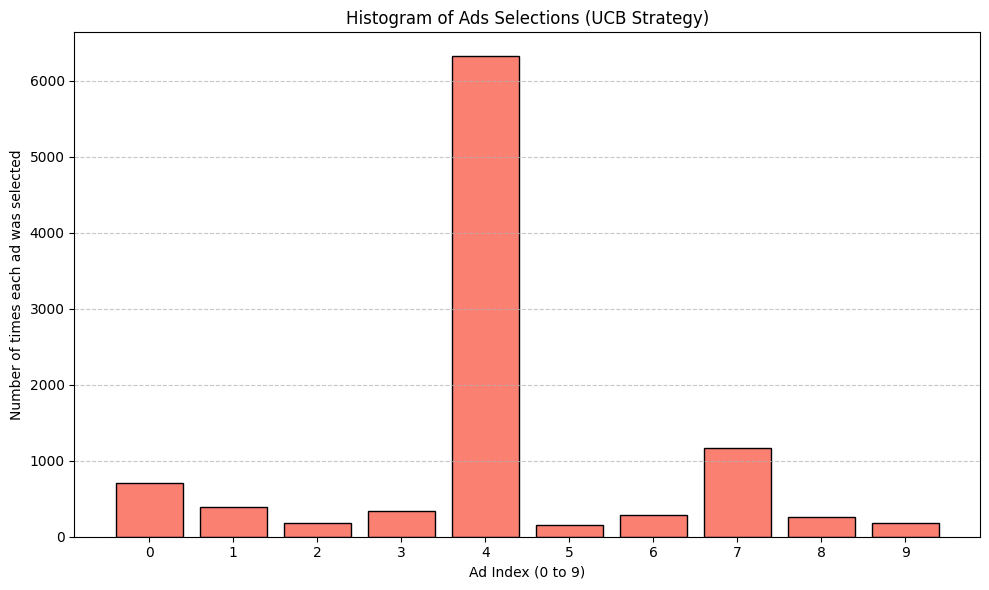

Total Reward Collected using UCB: 2178


In [2]:
# ---------------------------- Step 1: Import Required Libraries ----------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# ---------------------------- Step 2: Load Dataset ----------------------------
# Make sure the dataset path is correct. Adjust it if necessary.
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')  # Shape: (10000, 10)

# ---------------------------- Step 3: Initialize UCB Variables ----------------------------
N = 10000  # Total number of rounds (users)
d = 10     # Total number of ads (arms)
ads_selected = []                # To keep track of selected ads per round
numbers_of_selections = [0] * d  # How many times each ad has been selected
sums_of_reward = [0] * d         # Sum of rewards for each ad
total_reward = 0                 # Total cumulative reward

# ---------------------------- Step 4: UCB Algorithm ----------------------------
for n in range(N):  # Loop through each user
    ad = 0
    max_upper_bound = 0

    for i in range(d):  # Loop through each ad
        if numbers_of_selections[i] > 0:
            # Calculate average reward for this ad
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            # Calculate confidence interval (exploration factor)
            delta_i = math.sqrt(1.5 * math.log(n + 1) / numbers_of_selections[i])
            # Calculate UCB
            upper_bound = average_reward + delta_i
        else:
            # If ad has never been selected, prioritize it
            upper_bound = float('inf')

        # Select ad with the highest UCB
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i

    # Update tracking variables after selecting the best ad
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]  # 1 if user clicked the ad, else 0
    sums_of_reward[ad] += reward
    total_reward += reward

# ---------------------------- Step 5: Visualize Results ----------------------------
plt.figure(figsize=(10, 6))
plt.hist(ads_selected, bins=np.arange(d + 1) - 0.5, rwidth=0.8, color='salmon', edgecolor='black')
plt.title('Histogram of Ads Selections (UCB Strategy)')
plt.xlabel('Ad Index (0 to 9)')
plt.ylabel('Number of times each ad was selected')
plt.xticks(range(d))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ---------------------------- Output ----------------------------
print(f"Total Reward Collected using UCB: {total_reward}")
